In [1]:
# get matrix property from files
# Input: sparsityName, the name of file storing sparsity property, rank of matrix, number of non-zero elements
#        rowName, the name of file storing row index of non-zero elements in the order of rows
#        colName, the name of file storing column index of non-zero elements in the order of rows
# Output: rowIndexList
#         colIndexList
#         dataList
def getMatrixProperty(sparsityName, rowName, colName):
    # read data from sparsityMatrix
    # output: numNonZeros, number of non-zero elements; rankMatrix, rank of matrix; sparsityOfMatrix, sparsity of the matrix
    sparseMatrixFile = open(sparsityName,'r')
    content = sparseMatrixFile.read()
    contentList = content.splitlines()
    firstLine = contentList[0].split()
    rankMatrix = int(firstLine[0])
    numNonZeros = int(firstLine[1])
    sparsityOfMatrix = float(numNonZeros/(rankMatrix*rankMatrix))
    print("The matrix owns %d ranks and %d non-zero elements \n"%(rankMatrix, numNonZeros))
    print("The sparsity of the matrix is %e\n"%(sparsityOfMatrix))
    # read data from rowIndexMatrix and colIndexMatrix
    # output: rowIndexList, a list of integer for recording row; colIndexList, a list of integer for recording col
    rowMatrixFile = open(rowName,'r')
    colMatrixFile = open(colName,'r')
    contentRow = rowMatrixFile.read()
    contentRowList = contentRow.splitlines()
    contentCol = colMatrixFile.read()
    contentColList = contentCol.splitlines()
    rowIndexList = list()
    colIndexList = list()
    dataList = list()
    for element in range(numNonZeros):
        rowValue = int(contentRowList[element])
        colValue = int(contentColList[element])
        rowIndexList.append(rowValue)
        colIndexList.append(colValue)
        #dataList can be any value for adjacent matrix
        dataList.append(rowValue)
        pass
    return rowIndexList, colIndexList, dataList

The matrix owns 294912 ranks and 2041344 non-zero elements 

The sparsity of the matrix is 2.347098e-05



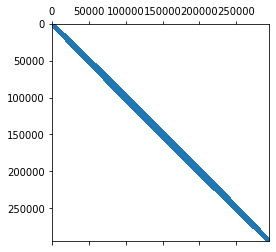

In [2]:
import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sparse
rowIndexList, colIndexList, dataList = getMatrixProperty('sparsityMatrix','rowIndexMatrix','colIndexMatrix')
row_ind = np.array(rowIndexList)
col_ind = np.array(colIndexList)
data = np.array(dataList, dtype=int)
mat_coo = sparse.coo_matrix((data, (row_ind, col_ind)))
plt.spy(mat_coo, markersize=1)